In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [183]:
df = pd.read_csv('2-multiplegradesdataset.csv')

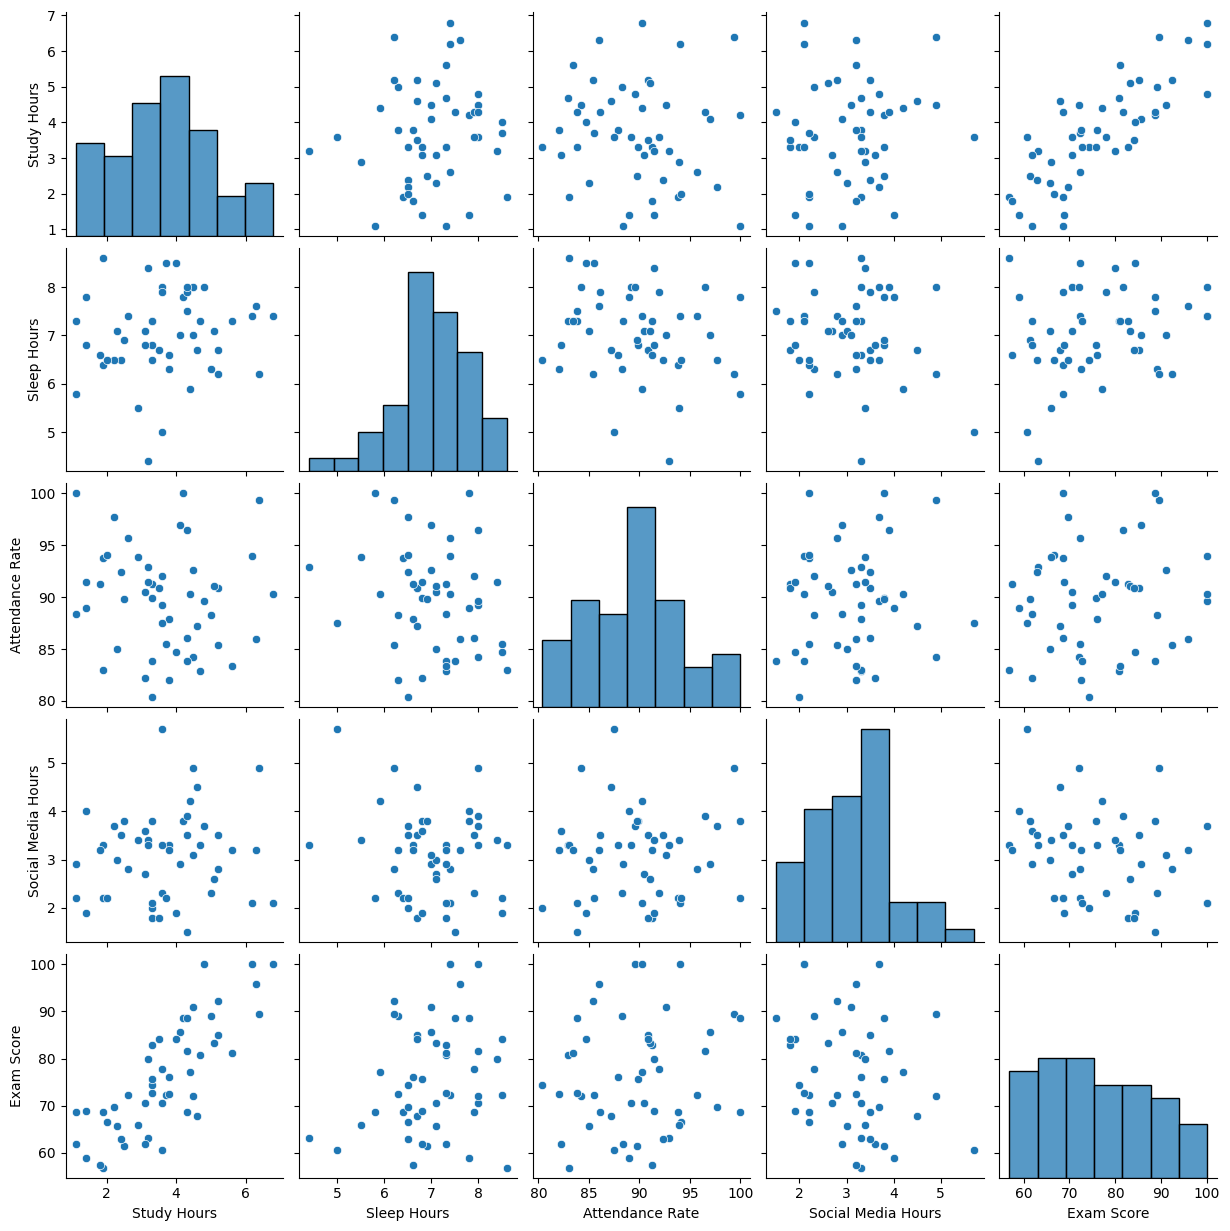

In [185]:
sns.pairplot(df)

In [186]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


In [189]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [191]:
# X-y atama
X = df.iloc[:,:-1] #değişken olan kolonları X'e verdik
y = df.iloc[:, -1] # sonucu y'ye verdik

In [193]:
# Train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [195]:
# Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
# Linear Regression tanımlama:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [199]:
# Eğitmek:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [201]:
# Oluşan çizgiye(fonksiyona bakalım):
print('Coefficients(Q0, Q2, Q3, Q4): ', regression.coef_)
print('Intercept(Q1): ', regression.intercept_)

Coefficients(Q0, Q2, Q3, Q4):  [ 9.28014703  1.78967062  3.24340001 -4.08127695]
Intercept(Q1):  77.41081081081082


In [203]:
# Test datasından değil de kenidmiz bir tane sallayıp deneyelim bakalım kaç alıyor:
new_student = [[5,7,90,4]]
scaled_new_student = scaler.transform(new_student)
y_prediction_for_new_student = regression.predict(new_student)
clipped_prediction_for_new_student = np.clip(y_pred, 0, 100)   # çıkan sonucu 0 ile 100 arasında verir
print(clipped_prediction_for_new_student)

[ 67.04704385  57.90545589  83.63084813  63.69399367  69.73079557
  80.76485587  93.76445033  65.93953528  64.58675718  78.42296106
  56.67860558  64.44046585 100.        ]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [205]:
# Gerçek prediction(Test Verisi Üzerinden):
y_pred = regression.predict(X_test)
y_pred # bunları yazdırdım alta ama benim için anlamlı değil, ben başarılı olup olmadığını R^2 ve Adj R^2 ile anlayabilirim.
# Ama öncesinde hata metriklerine bakalım: MSE, MAE, RMSE

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [215]:
# Mean Square Error:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))

14.600589378986284
3.2770264859627884
3.821071757895458


In [232]:
# Şimdi başarı oranını hesaplayalım: R^2 ve Adj R^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test) -1) /(len(y_test)-X_test.shape [1]-1)

print(r2)
print(adj_r2)

0.9156707345772709
0.8735061018659063
